In [5]:
import pandas as pd
import numpy as np
from os import listdir
import os
from collections import OrderedDict

Average frequency of top-100 tags from vacancies for each keyword-query.

In [6]:
mypath = '../tags/'
mean_val = {}

for d in listdir(mypath):
    avg = []
    for f in listdir(mypath + d):
        avg.append(pd.read_csv(mypath + d + '/' + f)['1.0'].mean())
    mean_val[d] = np.array(avg).mean()
    
dict(sorted(mean_val.items(), key=lambda item: item[1], reverse=True))

{'EPAM': 0.3533590534436313,
 'микросервис': 0.13500064509331736,
 'Intern_cyr': 0.13311586829927247,
 'res_php': 0.13268970853908715,
 'res_Java': 0.11108126967429077,
 'res_Javascript': 0.10054028047185665,
 'intern': 0.09774620002314705,
 'devops': 0.08718149419262784,
 'spark': 0.0803519184909779,
 'res_Data scientist': 0.0777702813030677,
 'res_Python': 0.07708974749775546,
 'Typescript': 0.07273957395590006,
 'Javascript': 0.06563703068214555,
 'Frontend': 0.06256851638429413,
 'php': 0.059095210433884826,
 'Golang': 0.0566237101348745,
 'C%23': 0.05476626763160005,
 'data': 0.05463671288928802,
 'Java': 0.04721237421581596,
 'sql': 0.044410200127075666,
 'Data scientist': 0.04370060550893327,
 'C%2B%2B': 0.04280993570198682,
 'python': 0.04051948757407787}

Average frequency of top-5 tags from vacancies for each keyword-query.

In [7]:
for d in listdir(mypath):
    avg = []
    for f in listdir(mypath + d):
        avg.append(pd.read_csv(mypath + d + '/' + f)['1.0'].iloc[:5].mean())
    mean_val[d] = np.array(avg).mean()
    
dict(sorted(mean_val.items(), key=lambda item: item[1], reverse=True))

{'res_php': 0.8023845459495609,
 'микросервис': 0.7041177403142114,
 'Intern_cyr': 0.6145978663871242,
 'EPAM': 0.6095914139674189,
 'res_Java': 0.5916026858932735,
 'devops': 0.584010742600924,
 'spark': 0.5812907564178795,
 'res_Javascript': 0.5801256101731803,
 'res_Python': 0.5083134564875282,
 'Typescript': 0.5036944184000041,
 'Frontend': 0.4701281390472242,
 'intern': 0.4618763258623439,
 'php': 0.42702083537492475,
 'Golang': 0.4141400900811243,
 'Javascript': 0.41319337286380814,
 'res_Data scientist': 0.38644743968488426,
 'C%2B%2B': 0.3848987323213113,
 'Java': 0.38038931703538453,
 'data': 0.3644239361367404,
 'C%23': 0.3621975579066244,
 'python': 0.33010181010172257,
 'Data scientist': 0.3029866500758216,
 'sql': 0.24499614075145812}

Average frequency of top-100 tags from vacancies for each keyword-query in last date for graphs.

In [8]:
#updateable tags
list_dir = ['C%23', 'C%2B%2B', 'Data', 'Data scientist', 'DevOps', 'Frontend', 'Golang', 'Intern',\
            'Intern_cyr', 'Java', 'Javascript', 'php', 'Python', 'Spark', 'SQL', 'Typescript', 'микросервис']

In [9]:
ordered_dict = OrderedDict()

for d in listdir(mypath):
    avg = []
    avg.append(pd.read_csv(mypath + d + '/' + listdir(mypath + d)[-1])['1.0'].mean())
    ordered_dict[d] = np.array(avg).mean()
    
ordered_dict = dict(sorted(ordered_dict.items(), key=lambda item: item[1], reverse=True))
# ordered_dict

Extracting date from names of files.

In [10]:
import re

date_x = ['9']
for name_file in listdir(mypath + '/Python'):
    date_x.append(re.findall('[0-9]{4}-[0-9]{2}-[0-9]{2}', name_file)[0])

Median frequency of top-20 tags from vacancies for each keyword-query and date, sorted by last date.

C:\Users\ksn\AppData\Local\Temp\ipykernel_12800\3916825495.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sorted(date_x, reverse=True), rotation=90)


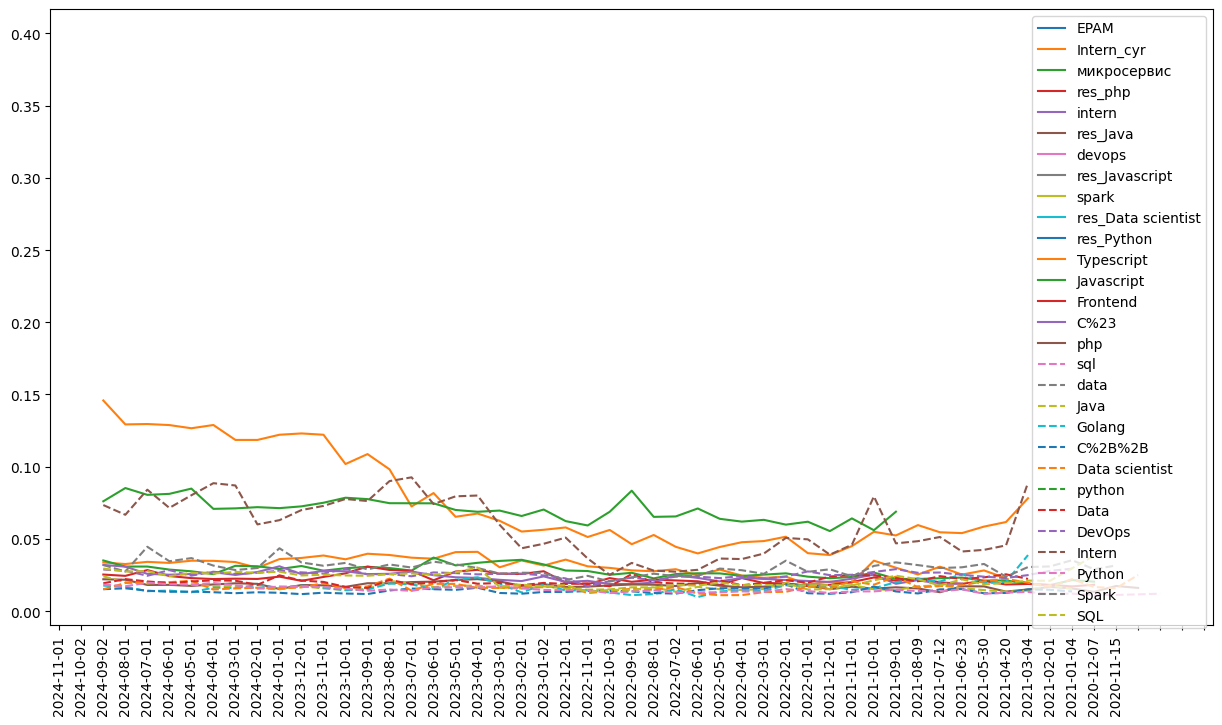

In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


all_val = ordered_dict
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

for d in list_dir:
    val = []
    for f in listdir(mypath + d):
        val.append(pd.read_csv(mypath + d + '/' + f)['1.0'].median())
    all_val[d] = val[::-1]

col = ""

for i in all_val.keys():
    if col != 'php':
        ax.plot(all_val[i])
        col = i
    else:
        ax.plot(all_val[i], linestyle='--')
        col = 'php'

ax.legend([i for i in all_val.keys()])
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xticklabels(sorted(date_x, reverse=True), rotation=90)
plt.show()